In [1]:
from __future__ import print_function, division
import torch
import torch.nn as nn
from torchvision import models
import os,sys
import matplotlib.pyplot as plt
import numpy as np
from utils import train,test
import pandas as pd
import glob
from skimage import io

os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [2]:
def load_torch_model(model_ft,model_path,device):
    for param in model_ft.parameters():
        param.requires_grad = False    
    param_update=[]
    for name,param in model_ft.layer3.named_parameters():
        param.requires_grad = True
        param_update.append(param)
    for name,param in model_ft.layer4.named_parameters():
        param.requires_grad = True
        param_update.append(param)
    for name,param in model_ft.fc.named_parameters():
        param.requires_grad = True
        param_update.append(param)
    model_ft = nn.DataParallel(model_ft)
    
    model_wts = torch.load(model_path)
    model_ft.load_state_dict(model_wts)    
    model_ft = model_ft.to(device)
    return model_ft

In [3]:
if __name__ == '__main__':    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")        
    batch_size = 512
    model_path = 'resnet_18_3.pth'
    model_ft = models.resnet18(pretrained = False)
    num_ftrs = model_ft.fc.in_features
    model_ft.fc = nn.Linear(num_ftrs, 2)
    model_ft = load_torch_model(model_ft,model_path,device)
    folder_name = '/cptjack/totem_disk/totem/M_MSI_MSS/normal/test'

test: 100%|██████████| 19/19 [03:06<00:00,  9.39s/it, CrossEntropyLoss - 0.4899, Balanced_acc - 0.7637, recall - 0.8382]
test Loss: 0.5645 Acc: 0.7758


              precision    recall  f1-score   support

      MSIMUT       0.19      0.70      0.30       469
         MSS       0.98      0.85      0.91      9230

   micro avg       0.84      0.84      0.84      9699
   macro avg       0.59      0.77      0.60      9699
weighted avg       0.94      0.84      0.88      9699





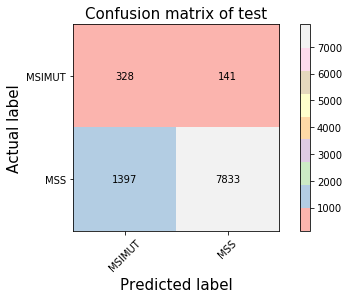

training complete in 3m 7s


In [4]:
    test_epoch = test.Test_epoch_from_folder(model_ft,folder_name,batch_size)
    result = test_epoch.predict()